In [1]:
from Robot import Robot, Controller
from trajectories import get_trajectories, figure_8
import numpy as np
from math import pi
from plotting import plotting
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab


In [2]:
def simulate(xkp,xkd,ykp,ykd,phikp,phikd):
    robot = Robot(1,1)
    control = Controller(xkp,xkd,ykp,ykd,phikp,phikd)
    # control = Controller(0,0,0,0,0,0)

#     X,Y,t = get_trajectories(2*pi/60,60.0,0.002)
    X,Y,t = figure_8(4*pi/60.0, 60, a_z=1.0, a_y=1.0, dt=0.002);
    x_path = X[0]
    x_dot_path = X[1]
    y_path = Y[0]
    y_dot_path = Y[1]
    dt = t[1] -t[0]
    robot.set_state(np.array([x_path[0],y_path[0],0,0]))
    x = []
    y = []

    for i in range(0,x_path.shape[0]-1):
        x.append(robot.X[0])
        y.append(robot.X[1])
        phi_commanded,u1 = control.XY_controller(x_path[i],
                                                 robot.X[0],
                                                 x_dot_path[i],
                                                 robot.Xq_dot,
                                                 y_path[i],
                                                 robot.X[1],
                                                 y_dot_path[i],
                                                 robot.Yq_dot,
                                                 robot.X[2])
        u2 = control.Psi_controller(phi_commanded,
                                    robot.X[2],
                                    0,
                                    robot.Phi_dot,
                                    u1,
                                    robot.D*1.50)
        robot.set_controls(u1,u2)
        robot.advance_state(dt)
        if ((robot.X[0]>10)or (robot.X[1]>10)):
            break
    for i in range(len(t[1:])-len(x)):
        x.append(0)
        y.append(0)


    plotting(x,y,x_path,y_path,t)


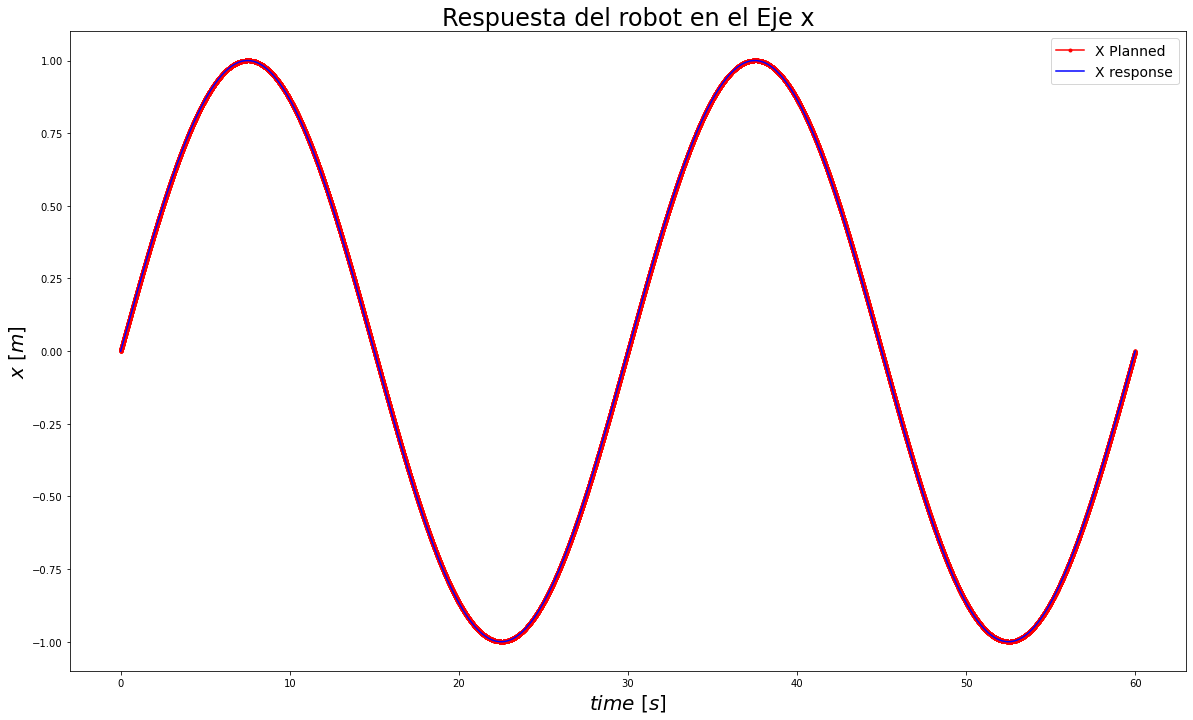

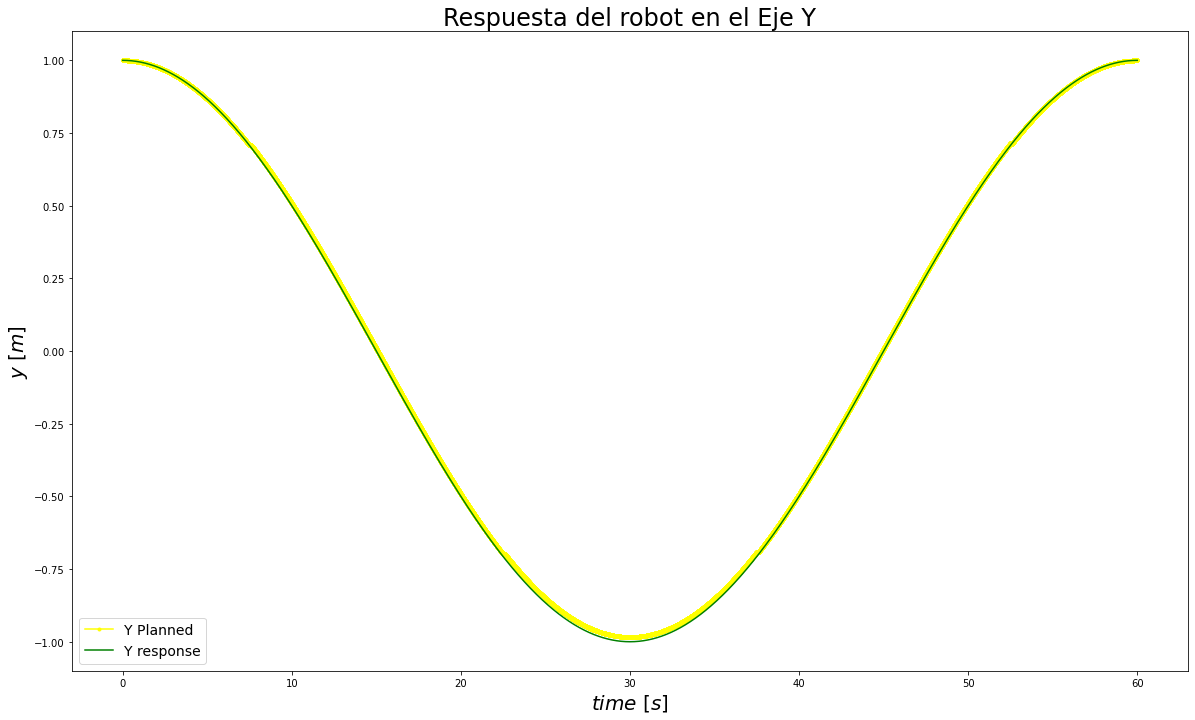

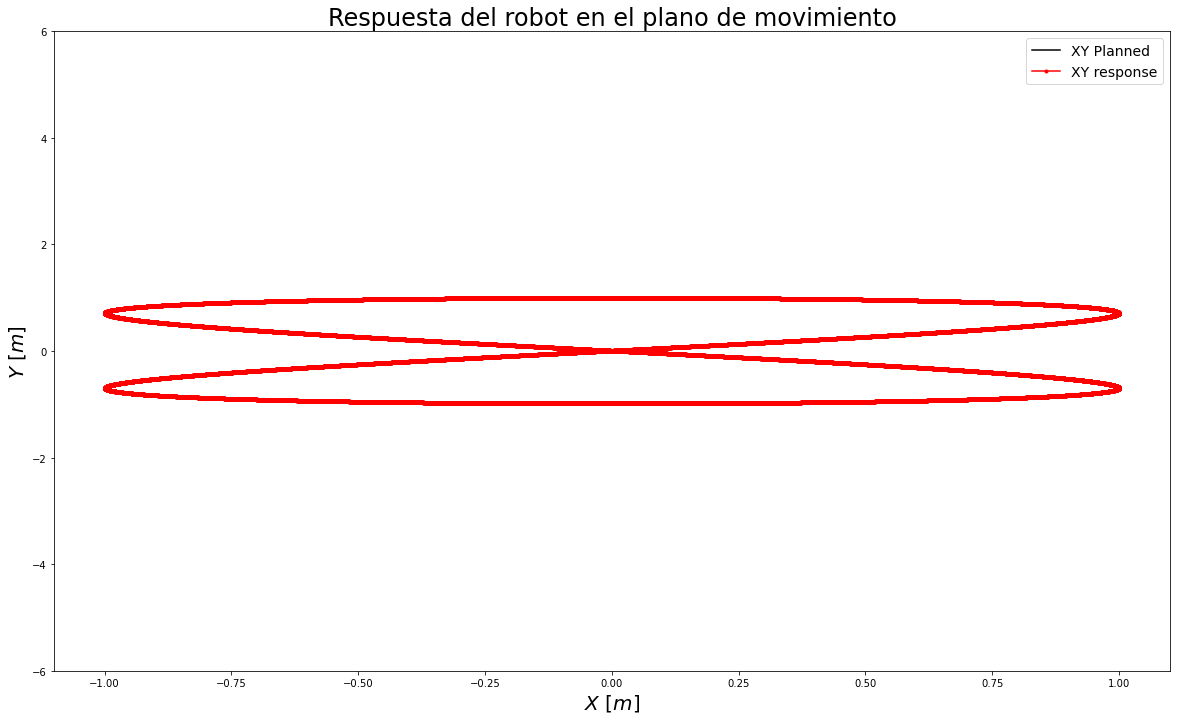

In [3]:
wnx =0.02
dx = 2.0
xkp = wnx**2
xkd = 2*dx*wnx
wny =0.02
dy = 2.0
ykp = wny**2
ykd = 2*dy*wny
wnphi =0.02
dphi = 0.03
phikp = wnphi**2
phikd = 2*dphi*wnphi

# wnx =0.1
# dx = 2.0
# xkp = wnx**2
# xkd = 2*dx*wnx
# wny =0.2
# dy = 2.0
# ykp = wny**2
# ykd = 2*dy*wny
# wnphi = 0.02
# dphi = 0.03
# phikp = wnphi**2
# phikd = 2*dphi*wnphi
# simulate(xkp,xkd,ykp,ykd,phikp,phikd)

# wnx =0.2
# dx = 2.0
# xkp = wnx**2
# xkd = 2*dx*wnx
# wny =0.2
# dy = 2.0
# ykp = wny**2
# ykd = 2*dy*wny
# wnphi = 0.03
# dphi = 0.05
# phikp = wnphi**2
# phikd = 2*dphi*wnphi
simulate(xkp,xkd,ykp,ykd,phikp,phikd)
